<a href="https://colab.research.google.com/github/mohdsaad379/sparksFoundation/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()


df=pd.DataFrame(iris.data, columns=iris.feature_names)
print("INPUT")
print(df.head(5))
print("actual output")
y=iris.target
print(y[0:5])

INPUT
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
actual output
[0 0 0 0 0]


In [65]:
x_train, x_test, y_train, y_test = train_test_split(df, y,train_size=0.7,random_state=10)

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=10)
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

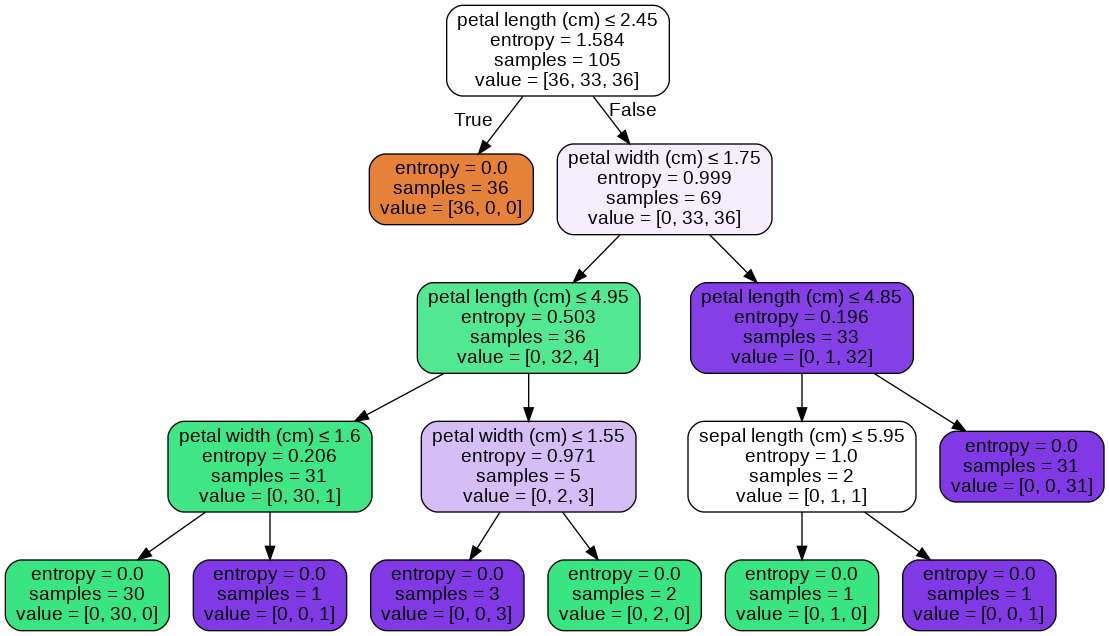

In [67]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [69]:
y_pred=tree.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [75]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))

0.9777777777777777
0.9761904761904763


In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [72]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["setosa","versicolor","virginica"])

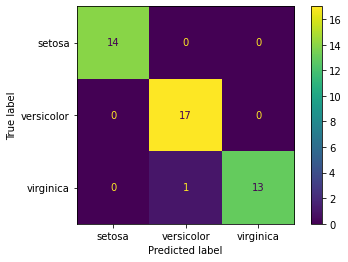

In [73]:
disp.plot()